In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from qiskit_aer import AerSimulator
from pathlib import Path
import sys
import time

# add repo root (parent of notebooks/) to sys.path
sys.path.append(str(Path.cwd().parent))
from lib.graphlib import GraphLib

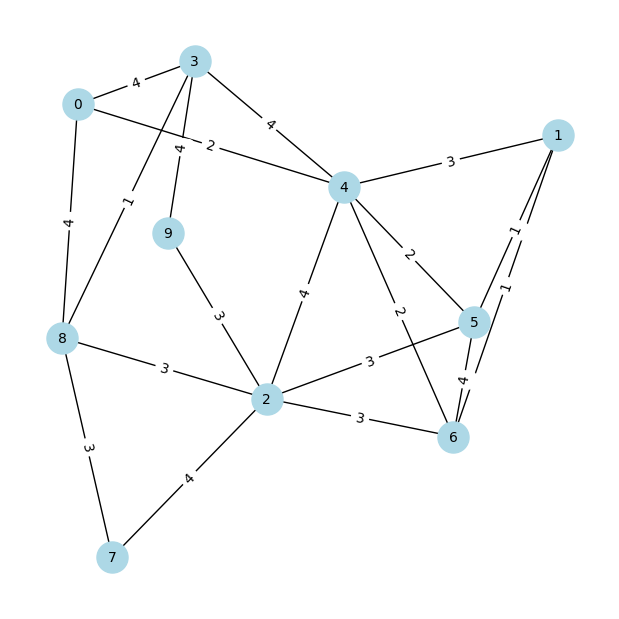

In [8]:
g = GraphLib()
g.generate_random_graph(num_vertices=10, edge_prob=0.5,
                        weight_range=(1, 5), seed=2)
g.visualize()

In [9]:
# Classical approximations. Use brute force only for small n.
t0 = time.time()
cut_brute, w_brute = g.max_cut_bruteforce()
t_brute = time.time() - t0

t0 = time.time()
cut_rand, w_rand = g.max_cut_random(trials=2000)
t_rand = time.time() - t0

t0 = time.time()
cut_local, w_local = g.max_cut_local_search(iterations=200)
t_local = time.time() - t0

print("Brute force approx", w_brute, "time", t_brute)
print("Random approx", w_rand, "time", t_rand)
print("Local search approx", w_local, "time", t_local)

Brute force approx 43 time 0.07382464408874512
Random approx 43 time 0.10981941223144531
Local search approx 40 time 0.0008029937744140625


In [10]:
# analytic p=1 optimize
g0 = time.time()
gamma_star, beta_star, val_star, refine_info = g.optimize_qaoa1_classical(
    grid_res=21, refine=True)
total_t = time.time() - g0
print("Analytic best:", (gamma_star, beta_star),
      "value:", val_star, "total_time:", total_t)
print("refine_info:", refine_info, "total_time:", total_t)

Analytic best: (0.4820391869080408, 0.32246339042149275) value: 34.03743858394538 total_time: 0.25991296768188477
refine_info: {'success': True, 'message': 'Return from COBYLA because the trust region radius reaches its lower bound.'} total_time: 0.25991296768188477


In [11]:
# simulate best params with AerSimulator
t0 = time.time()
res = g.qaoa1_expectation_simulated(
    gamma_star, beta_star, shots=1024, backend=AerSimulator())
total_t = time.time() - t0
print("simulation time:", total_t, "Simulation result:", res)

simulation time: 2.126148223876953 Simulation result: {'expectation': 26.341796875, 'best_bitstring': '0100101110', 'best_cut': 43, 'counts': {'1000011111': 2, '0011101011': 2, '1111010000': 1, '1001011011': 8, '0011111100': 3, '0110000110': 9, '0011110111': 3, '1110001001': 1, '0011011101': 1, '1001010111': 2, '1101111000': 1, '1110110111': 5, '1000111110': 4, '1111011110': 2, '0100000011': 7, '1010000111': 2, '1010011101': 6, '1100100000': 4, '1111101110': 1, '0010111110': 4, '0101110001': 14, '1000111111': 2, '1110110100': 1, '1011101101': 1, '1000100001': 6, '0010000011': 2, '1000100011': 1, '1111100011': 1, '0001011111': 2, '0111100010': 2, '0110011100': 3, '0100111010': 1, '0101010111': 4, '0010001001': 1, '1011110111': 1, '0110000010': 5, '1001111000': 5, '0010111111': 4, '0001010011': 4, '0001111001': 3, '1111111100': 4, '0100110111': 2, '0101011010': 2, '1011111100': 8, '1101100110': 1, '0110010101': 7, '1001100011': 1, '1101110100': 5, '0000101000': 5, '1000011010': 3, '01110